In [1]:
import pandas as pd

In [2]:
cryptos = pd.read_csv('crypto_data.csv')

In [3]:
cryptos.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [12]:
traded = cryptos.loc[cryptos['IsTrading']].copy()

In [13]:
print(len(cryptos), len(traded))

1252 1144


In [14]:
traded.drop(columns=['IsTrading', 'CoinName', 'Unnamed: 0'], inplace=True)

In [15]:
traded.dropna(axis=0, how='any', inplace=True)

In [16]:
len(traded)

685

In [17]:
mined = traded.loc[traded['TotalCoinsMined'] > 0].copy()

In [18]:
len(mined)

532

In [26]:
mined.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [27]:
mined.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [32]:
mined['TotalCoinSupply'] = mined['TotalCoinSupply'].apply(lambda x: float(x))

In [34]:
ohencode = pd.get_dummies(mined, prefix=['algo', 'prooftype'])
len(ohencode.columns)

98

We went from 4 columns to almost 100. I happen to know that there were over 70 distinct values under the algorithm column. It is possible that we should have instead created an 'other' clump for all values that had only 1 instance of the algorithm in usage.

In [35]:
from sklearn.preprocessing import StandardScaler
mine_scaled = StandardScaler().fit_transform(ohencode)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.9)
crypto_pca = pca.fit_transform(mine_scaled)

In [44]:
print(len(pca.explained_variance_ratio_))
(pca.explained_variance_ratio_)

74


array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

We have only reduced our number of features by 20 in this case, which is still cause for some concern.

In [46]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=35)
tsne_crypto = tsne.fit_transform(crypto_pca)
tsne_crypto.shape

(532, 2)

t-SNE has successfully reduced us to two features.

In [50]:
import matplotlib.pyplot as plt

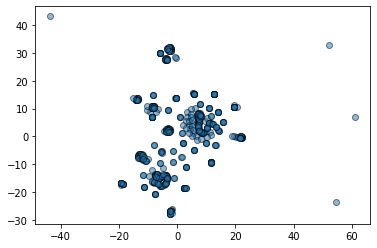

In [56]:
plt.scatter(tsne_crypto[:,0], tsne_crypto[:,1], alpha=0.5, edgecolors='black')